In [1]:
import sys
print(sys.version)

3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]


# NLP_DevelopingWordCountMinusNegativeWord

In [2]:
config = {
    'WhichFetureToUseForCorpusCreation' : '''['Symptom', 'Symptom_desc']'''
}
# ['Symptom', 'Symptom_desc', 'OtherRelated', 'OtherRelated_desc']

In [3]:
FeatueToUse = [ i for i in config['WhichFetureToUseForCorpusCreation'].split("'") if len(i) > 2]
FeatueToUse

['Symptom', 'Symptom_desc']

## Importing the Dataset

In [4]:
import json

# with open('input/2018-03-14T14-51-14.json') as data_file:
with open('input/2018-03-17T19-04-38.json') as data_file:  
    data = json.load(data_file)
print(type(data))
print(len(data))
# data = data[0]
# print(type(data))

<class 'list'>
3000


In [5]:
PrecedingText = "Obs_"
WholeDataAsDict = {}
for i in range(len(data)):
    WholeDataAsDict[PrecedingText + str(i)] = data[i]

# print(type(WholeDataAsDict))
# for i in  WholeDataAsDict:
#     print(type(WholeDataAsDict[i]))
#     for j in WholeDataAsDict[i]:
#         print(type(WholeDataAsDict[i][j]))

# print(WholeDataAsDict['Obs_0'])
for i in WholeDataAsDict['Obs_0']:
    print(i, "    ", WholeDataAsDict['Obs_0'][i])

Symptom      ['Muscle cramps or spasms (painful)']
Symptom_desc      ['WebMD Symptom Checker helps you find the most common medical conditions indicated by the symptoms muscle cramps or spasms (painful) including Muscle strain.', 'There  is 1 condition  associated with muscle cramps or spasms (painful). The links below will provide you with more detailed information on these medical conditions from the WebMD Symptom Checker and help provide a better understanding of causes and treatment of these related conditions.']
OtherRelated      ['Muscle strain']
OtherRelated_desc      ['Muscle strain occurs when muscles are stressed, overworked, or injured due to physical activity or labor. ']
URL      https://symptomchecker.webmd.com/multiple-symptoms?symptoms=muscle-cramps-or-spasms-(painful)&symptomids=282&locations=22


In [6]:
for features in WholeDataAsDict['Obs_0']:
    print(features)

Symptom
Symptom_desc
OtherRelated
OtherRelated_desc
URL


### Creating a pool of Text

In [7]:
FeatueToUse = [ i for i in config['WhichFetureToUseForCorpusCreation'].split("'") if len(i) > 2]
WholeText = []
for obs in WholeDataAsDict:
    for feature in WholeDataAsDict[obs]:
        if (feature in FeatueToUse):
            for text_index in range(len(WholeDataAsDict[obs][feature])):
                WholeText.append(WholeDataAsDict[obs][feature][text_index])
WholeText = '\n\n'.join(WholeText)
print(WholeText)

Muscle cramps or spasms (painful)

WebMD Symptom Checker helps you find the most common medical conditions indicated by the symptoms muscle cramps or spasms (painful) including Muscle strain.

There  is 1 condition  associated with muscle cramps or spasms (painful). The links below will provide you with more detailed information on these medical conditions from the WebMD Symptom Checker and help provide a better understanding of causes and treatment of these related conditions.

Bloating or fullness, Constipation, Increased passing gas and Muscle cramps or spasms (painful)

WebMD Symptom Checker helps you find the most common medical conditions indicated by the symptoms bloating or fullness, constipation, increased passing gas and muscle cramps or spasms (painful) including Irritable bowel syndrome, Constipation (adult), and Constipation (child).

There  are 36 conditions  associated with bloating or fullness, constipation, increased passing gas and muscle cramps or spasms (painful). T

## Converting the structure of the data to Pandas

In [8]:
import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 500)

FeatureToUse = [ i for i in config['WhichFetureToUseForCorpusCreation'].split("'") if len(i) > 2]
FeatureToUseToCreateFullPDView = FeatureToUse + ['OtherRelated', 'OtherRelated_desc', 'URL']
import pandas as pd
WholeDataAsPD = pd.DataFrame(columns = FeatureToUseToCreateFullPDView) 

var = [[], [], [], [], []]
renameDict = {}
for i in range(len(FeatureToUseToCreateFullPDView)):
    renameDict[i] = FeatureToUseToCreateFullPDView[i]

for obs in WholeDataAsDict:
        for ind in range(len(FeatureToUseToCreateFullPDView)):
            var[ind] = WholeDataAsDict[obs][FeatureToUseToCreateFullPDView[ind]]
        DF = pd.DataFrame([str(i) for i in var]).T.rename(columns = renameDict).iloc[:, :len(FeatureToUseToCreateFullPDView)]
        WholeDataAsPD = WholeDataAsPD.append(DF, ignore_index=True)
print("Shape Of the Final Pandas: ", WholeDataAsPD.shape)
WholeDataAsPD.head()

Shape Of the Final Pandas:  (3000, 5)


,Symptom,Symptom_desc,OtherRelated,OtherRelated_desc,URL
0,['Muscle cramps or spasms (painful)'],"['WebMD Symptom Checker helps you find the most common medical conditions indicated by the symptoms muscle cramps or spasms (painful) including Muscle strain.', 'There is 1 condition associated with muscle cramps or spasms (painful). The links below will provide you with more detailed information on these medical conditions from the WebMD Symptom Checker and help provide a better understanding of causes and treatment of these related conditions.']",['Muscle strain'],"['Muscle strain occurs when muscles are stressed, overworked, or injured due to physical activity or labor. ']",https://symptomchecker.webmd.com/multiple-symptoms?symptoms=muscle-cramps-or-spasms-(painful)&symptomids=282&locations=22
1,"['Bloating or fullness, Constipation, Increased passing gas and Muscle cramps or spasms (painful)']","['WebMD Symptom Checker helps you find the most common medical conditions indicated by the symptoms bloating or fullness, constipation, increased passing gas and muscle cramps or spasms (painful) including Irritable bowel syndrome, Constipation (adult), and Constipation (child).', 'There are 36 conditions associated with bloating or fullness, constipation, increased passing gas and muscle cramps or spasms (painful). The links below will provide you with more detailed information on these m...","['Irritable bowel syndrome', 'Constipation (adult)', 'Constipation (child)', 'Gas pains', 'Muscle strain', 'Giardiasis', 'Gastroenteritis', 'Dehydration (Children)', 'Medication reaction or side-effect', 'Lactose intolerance', 'Stool holding (encopresis)', 'Diverticulosis', 'Helicobacter pylori infection', 'Gallstones', 'Kidney infection (pyelonephritis)', 'Anal fissure', 'Colon cancer', 'Cystic fibrosis', 'Foreign object in the rectum', 'Taking iron supplements', 'Low fiber diet', 'Intestin...","['Irritable bowel syndrome is a common condition that causes painful spasms and cramping in the large intestine.', 'Constipation is having less than three bowel movements a week, causing hard stools, abdominal pain and more.', 'Constipation is having less than three bowel movements a week, causing hard stools, abdominal pain and more.', 'Belching or passing gas clears gas from the digestive tract, but when gas is stuck it causes abdominal pain. ', 'Muscle strain occurs when muscles are stres...",https://symptomchecker.webmd.com/multiple-symptoms?symptoms=bloating-or-fullness|constipation|increased-passing-gas|muscle-cramps-or-spasms-(painful)&symptomids=23|58|176|282&locations=24|24|24|24
2,"['Bruising or discoloration, Color change, Pain or discomfort and Swelling']","['WebMD Symptom Checker helps you find the most common medical conditions indicated by the symptoms bruising or discoloration, color change, pain or discomfort and swelling including Bruise or contusion, Hematoma, and Corns and calluses.', 'There are 37 conditions associated with bruising or discoloration, color change, pain or discomfort and swelling. The links below will provide you with more detailed information on these medical conditions from the WebMD Symptom Checker and help provide...","['Bruise or contusion', 'Hematoma', 'Corns and calluses', 'Osteomyelitis (bone infection)', 'Peripheral neuropathy', 'Sprained ankle', 'Chronic kidney disease', 'Bunions', 'Aortic regurgitation', 'Venous insufficiency', 'Water retention', 'Cold exposure', 'Trauma or injury', 'Poison ivy, oak, and sumac', 'Pulmonary hypertension', 'Rheumatoid arthritis', 'Glomerulonephritis', 'Metatarsalgia', 'Lumbar spinal stenosis', 'Stress fractures', 'Thrombophlebitis', 'Lumbar (low back) herniated disk',...","['Bruises, or contusions, cause skin discoloration, swelling and tenderness.', 'A hematoma is a collection of blood in the tissue outside of a damaged blood vessel, usually after an injury. ', 'Corns and calluses are areas of thick, hard skin on the hands and feet. ', 'Osteomyelitis is an infection of a bo

In [9]:
print('Total No. of Unique Cases/ Observations in Column are')
for col in WholeDataAsPD.columns:
    print("\'" + col + "\' = ",len(WholeDataAsPD[col].unique()))
print("\nTotal Duplicate Observation In our Dataset = ", WholeDataAsPD.shape[0] - len(WholeDataAsPD['URL'].unique()))

Total No. of Unique Cases/ Observations in Column are
'Symptom' =  2436
'Symptom_desc' =  2449
'OtherRelated' =  2363
'OtherRelated_desc' =  2363
'URL' =  2464

Total Duplicate Observation In our Dataset =  536


In [10]:
print(WholeDataAsPD.iloc[1,:])

Symptom                                                                                                                                                                                                                                                                                                                                                                                                                              ['Bloating or fullness, Constipation, Increased passing gas and Muscle cramps or spasms (painful)']
Symptom_desc         ['WebMD Symptom Checker helps you find the most common medical conditions indicated by the symptoms bloating or fullness, constipation, increased passing gas and muscle cramps or spasms (painful) including Irritable bowel syndrome, Constipation (adult), and Constipation (child).', 'There  are 36 conditions  associated with bloating or fullness, constipation, increased passing gas and muscle cramps or spasms (painful). The links below will provide you wit

## Working with Text Data

### Text Preprocessing

In [11]:
import re
# ! pip install nltk
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
type(stopwords)
# for word in set(stopwords.words('english')):
#     print(word)

[nltk_data] Downloading package stopwords to /home/mohit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


nltk.corpus.util.LazyCorpusLoader

In [12]:
def TextCleaningFunction(Text, usePorterStemmer = True):
    ## Here Feed Words you want to remove
    stoplist = set("webmd symptom checker helps you find the most common medical conditions have indicated related associated links symptoms treatment causes by the a an and to of is frequent from in on if but i or you will are these there detailed information below more with provide understanding better help including".split())

    Text = re.sub('[^a-zA-Z]', ' ', str(Text))
    Text = Text.lower()
    Text = Text.split()
    Text = [word for word in Text if word not in stoplist]
    # print(temp)
    # print("Initial Length:", len(temp))
    
    if usePorterStemmer == True:
        ps = PorterStemmer()   # semantic is not needed
        Text = [ps.stem(word) for word in Text if word not in set(stopwords.words('english'))] ### update this based on requirement
    else:
        Text = [word for word in Text] 

    # print(temp)
    # print("Final Length: ", len(temp))
    
    return Text

#### Test Cleaning Without PorterStemmer

In [13]:
### Testing this on Whole Text
passage = WholeText
print("Initial Length:", len([word for word in passage.split()]))
word_list = TextCleaningFunction(passage, False)
print("Final Length:", len(word_list))
print(word_list[0:10])

Initial Length: 274863
Final Length: 80598
['muscle', 'cramps', 'spasms', 'painful', 'muscle', 'cramps', 'spasms', 'painful', 'muscle', 'strain']


In [14]:
## Remove Words That Only Appear Once 
from collections import defaultdict
frequency = defaultdict(int)
for token in word_list:
    frequency[token] += 1
# frequency
# [token for token in word_list if frequency[token] > 1]

DF = pd.DataFrame(columns = ["Word", "Frequency"])
for token in frequency:
    DF = DF.append(pd.DataFrame(data = {"Word": [token], "Frequency": [frequency[token]]}, columns = ["Word", "Frequency"]), ignore_index = True)
DF.head()

,Word,Frequency
0,muscle,1885
1,cramps,1549
2,spasms,1524
3,painful,1563
4,strain,354


In [15]:
DF.sort_values(by = 'Frequency', ascending= False)

,Word,Frequency
21,pain,3786
22,discomfort,3018
7,fullness,2238
13,bowel,1977
0,muscle,1885
6,bloating,1866
3,painful,1563
1,cramps,1549
2,spasms,1524
47,touch,1503


#### Test Cleaning With PorterStemmer

In [16]:
### Testing this on Whole Text
passage = WholeText
print("Initial Length:", len([word for word in passage.split()]))
word_list = TextCleaningFunction(passage, True)
print("Final Length:", len(word_list))
print(word_list[0:10])

Initial Length: 274863
Final Length: 80416
['muscl', 'cramp', 'spasm', 'pain', 'muscl', 'cramp', 'spasm', 'pain', 'muscl', 'strain']


In [17]:
## Remove Words That Only Appear Once 
from collections import defaultdict
frequency = defaultdict(int)
for token in word_list:
    frequency[token] += 1
# frequency
# [token for token in word_list if frequency[token] > 1]

DF = pd.DataFrame(columns = ["Word", "Frequency"])
for token in frequency:
    DF = DF.append(pd.DataFrame(data = {"Word": [token], "Frequency": [frequency[token]]}, columns = ["Word", "Frequency"]), ignore_index = True)
DF.head()

,Word,Frequency
0,muscl,1891
1,cramp,1549
2,spasm,1525
3,pain,6011
4,strain,356


In [18]:
DF.sort_values(by = 'Frequency', ascending= False).head(50)

,Word,Frequency
3,pain,6011
21,discomfort,3018
7,full,2238
13,bowel,1977
0,muscl,1891
6,bloat,1866
1,cramp,1549
2,spasm,1525
44,touch,1503
17,bruis,1282


#### It is Obsereved that there isn't much difference in the no. of words, but many word has lost much of their interpretibility.

### Implementing on DF

In [19]:
WholeDataAsPD.columns

Index(['Symptom', 'Symptom_desc', 'OtherRelated', 'OtherRelated_desc', 'URL'], dtype='object')

In [20]:
ColumnDataList = [[], [], [], [], []]
for index in range(len(WholeDataAsPD.columns)):
    ColumnDataList[index] = [TextCleaningFunction(elem, usePorterStemmer = False) for elem in WholeDataAsPD[WholeDataAsPD.columns[index]]]

In [21]:
print(ColumnDataList[0][0:5])
print("\n", ColumnDataList[4][0:5])

[['muscle', 'cramps', 'spasms', 'painful'], ['bloating', 'fullness', 'constipation', 'increased', 'passing', 'gas', 'muscle', 'cramps', 'spasms', 'painful'], ['bruising', 'discoloration', 'color', 'change', 'pain', 'discomfort', 'swelling'], ['pain', 'discomfort'], ['feeling', 'faint', 'nausea', 'vomiting']]

 [['https', 'symptomchecker', 'com', 'multiple', 'muscle', 'cramps', 'spasms', 'painful', 'symptomids', 'locations'], ['https', 'symptomchecker', 'com', 'multiple', 'bloating', 'fullness', 'constipation', 'increased', 'passing', 'gas', 'muscle', 'cramps', 'spasms', 'painful', 'symptomids', 'locations'], ['https', 'symptomchecker', 'com', 'multiple', 'bruising', 'discoloration', 'color', 'change', 'pain', 'discomfort', 'swelling', 'symptomids', 'locations'], ['https', 'symptomchecker', 'com', 'multiple', 'pain', 'discomfort', 'symptomids', 'locations'], ['https', 'symptomchecker', 'com', 'multiple', 'feeling', 'faint', 'nausea', 'vomiting', 'symptomids', 'locations']]


#### But for Our Requirement it will be good to combine the title with description

In [22]:
## Only Keeping the Data for the columns that are desired
ColumnDataList_Subset = [[], [], [], [], []]
for index in range(len(FeatueToUse)):
    ColumnDataList_Subset[index] = WholeDataAsPD[FeatueToUse[index]].copy()
# ColumnDataList_Subset[index] = [TextCleaningFunction(elem, usePorterStemmer = False) for elem in WholeDataAsPD[FeatueToUse[index]]]
# len(ColumnDataList_Subset)

# ## Removing the unnecessary empty list
# for i in range(len(ColumnDataList_Subset)):
#     print(len(ColumnDataList_Subset[i]))
#     if len(ColumnDataList_Subset[i]) == 0:
#         ColumnDataList_Subset.pop(i)
        
## Contatinating these Feature Data
CombinedData_list = []
for col in range(len(ColumnDataList_Subset)):
    for obs in range(len(ColumnDataList_Subset[col])):
        if(col == 0):
            CombinedData_list.append(ColumnDataList_Subset[col][obs])
        else:
            CombinedData_list[obs] = CombinedData_list[obs] + ColumnDataList_Subset[col][obs]

print(len(CombinedData_list))
print(CombinedData_list[0:2])

3000
["['Muscle cramps or spasms (painful)']['WebMD Symptom Checker helps you find the most common medical conditions indicated by the symptoms muscle cramps or spasms (painful) including Muscle strain.', 'There  is 1 condition  associated with muscle cramps or spasms (painful). The links below will provide you with more detailed information on these medical conditions from the WebMD Symptom Checker and help provide a better understanding of causes and treatment of these related conditions.']", "['Bloating or fullness, Constipation, Increased passing gas and Muscle cramps or spasms (painful)']['WebMD Symptom Checker helps you find the most common medical conditions indicated by the symptoms bloating or fullness, constipation, increased passing gas and muscle cramps or spasms (painful) including Irritable bowel syndrome, Constipation (adult), and Constipation (child).', 'There  are 36 conditions  associated with bloating or fullness, constipation, increased passing gas and muscle cramps

In [23]:
# lki = [['asda', 'basf','fsafsac','afsd'], ['a1', 'b2','c3','d4']]
# for lenli in range(len(lki)):
#     if lenli == 0:
#         templi = lki[0]
#     else:
#         templi = templi + lki[lenli]
# # lki[0] + lki[1]
# templi
# (CombinedData_list[0]).split('''", "''')
## Converting even the list to string
# for obs in range(len(CombinedData_list)):
# #     CombinedData_list[obs] = ''.join([char for char in str(CombinedData_list[1]) if char not in ['[', ']', '(', ')']])
# #     CombinedData_list[obs] = ''.join([str(li) for li in str(CombinedData_list[obs])])
#     for lenlists in range(len(CombinedData_list[obs])):
#         if(lenlists == 0):
#             temp_list = CombinedData_list[obs][0]
#         else:
#             temp_list = temp_list + " " + CombinedData_list[obs][lenlists]
#     CombinedData_list[obs] = temp_list

# print(len(CombinedData_list))
# print(CombinedData_list[0:2])

In [24]:
## Doing Text Cleaning
CombinedData_list = [TextCleaningFunction(str(elem), usePorterStemmer = False) for elem in CombinedData_list]

print(len(CombinedData_list))
print(CombinedData_list[0:2])

3000
[['muscle', 'cramps', 'spasms', 'painful', 'muscle', 'cramps', 'spasms', 'painful', 'muscle', 'strain', 'condition', 'muscle', 'cramps', 'spasms', 'painful'], ['bloating', 'fullness', 'constipation', 'increased', 'passing', 'gas', 'muscle', 'cramps', 'spasms', 'painful', 'bloating', 'fullness', 'constipation', 'increased', 'passing', 'gas', 'muscle', 'cramps', 'spasms', 'painful', 'irritable', 'bowel', 'syndrome', 'constipation', 'adult', 'constipation', 'child', 'bloating', 'fullness', 'constipation', 'increased', 'passing', 'gas', 'muscle', 'cramps', 'spasms', 'painful']]


### Creating a corpus

In [25]:
### Creating a mapping b/w questions and ids
Storage_Folder = "Embedding_Storage/"
from gensim import corpora
import os
dictionary = corpora.Dictionary(CombinedData_list)
dictionary.save(os.path.join(Storage_Folder, 'URL_text.dict'))  # store the dictionary, for future reference
print(dictionary)

Dictionary(756 unique tokens: ['condition', 'cramps', 'muscle', 'painful', 'spasms']...)


In [26]:
print(dictionary.token2id)

{'condition': 0, 'cramps': 1, 'muscle': 2, 'painful': 3, 'spasms': 4, 'strain': 5, 'adult': 6, 'bloating': 7, 'bowel': 8, 'child': 9, 'constipation': 10, 'fullness': 11, 'gas': 12, 'increased': 13, 'irritable': 14, 'passing': 15, 'syndrome': 16, 'bruise': 17, 'bruising': 18, 'calluses': 19, 'change': 20, 'color': 21, 'contusion': 22, 'corns': 23, 'discoloration': 24, 'discomfort': 25, 'hematoma': 26, 'pain': 27, 'swelling': 28, 'food': 29, 'gastritis': 30, 'pains': 31, 'poisoning': 32, 'children': 33, 'dehydration': 34, 'exhaustion': 35, 'faint': 36, 'feeling': 37, 'heat': 38, 'nausea': 39, 'vomiting': 40, 'abscess': 41, 'bulge': 42, 'cellulitis': 43, 'enlarged': 44, 'glands': 45, 'lump': 46, 'swollen': 47, 'touch': 48, 'warm': 49, 'fatigue': 50, 'indigestion': 51, 'peptic': 52, 'stomach': 53, 'ulcer': 54, 'upset': 55, 'acute': 56, 'allergens': 57, 'breathing': 58, 'congestion': 59, 'difficulty': 60, 'indoor': 61, 'nasal': 62, 'nose': 63, 'pharyngitis': 64, 'sinusitis': 65, 'sore': 66,

### Testing this on new data

In [27]:
NewText = "'Muscle cramps or spasms (painful) WebMD Symptom Checker helps you find the most common medical conditions indicated by the symptoms muscle cramps or spasms (painful) including Muscle strain"
NewText = TextCleaningFunction(NewText, usePorterStemmer = False)

new_vec = dictionary.doc2bow(NewText)
print(NewText)
print(new_vec)

['muscle', 'cramps', 'spasms', 'painful', 'muscle', 'cramps', 'spasms', 'painful', 'muscle', 'strain']
[(1, 2), (2, 3), (3, 2), (4, 2), (5, 1)]


### Storing the corpus in multiple Format so that it can be used later

In [28]:
## testing on the subset of loaded data
# corpus = [dictionary.doc2bow(text) for text in texts[0:10]]
corpus = [dictionary.doc2bow(text) for text in CombinedData_list]

# store to disk, for later use
corpora.MmCorpus.serialize(os.path.join(Storage_Folder, 'URL_text_corpus.mm'), corpus)
corpora.SvmLightCorpus.serialize(os.path.join(Storage_Folder, 'URL_text_corpus.svmlight'), corpus)
corpora.BleiCorpus.serialize(os.path.join(Storage_Folder, 'URL_text_corpus.lda-c'), corpus)
corpora.LowCorpus.serialize(os.path.join(Storage_Folder, 'URL_text_corpus.low'), corpus)

print("ptinting some text as embeddings")
for c in corpus[0:5]:
    print(c)

ptinting some text as embeddings
[(0, 1), (1, 3), (2, 4), (3, 3), (4, 3), (5, 1)]
[(1, 3), (2, 3), (3, 3), (4, 3), (6, 1), (7, 3), (8, 1), (9, 1), (10, 5), (11, 3), (12, 3), (13, 3), (14, 1), (15, 3), (16, 1)]
[(17, 1), (18, 3), (19, 1), (20, 3), (21, 3), (22, 1), (23, 1), (24, 3), (25, 3), (26, 1), (27, 3), (28, 3)]
[(12, 1), (25, 3), (27, 3), (29, 1), (30, 1), (31, 1), (32, 1)]
[(29, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 3), (37, 3), (38, 1), (39, 3), (40, 3)]


In [29]:
DF = WholeDataAsPD.copy()

Symptom = [" ".join(TextCleaningFunction(str(text), usePorterStemmer = False)) for text in DF['Symptom']]
Symptom_desc = [" ".join(TextCleaningFunction(str(text), usePorterStemmer = False)) for text in DF['Symptom_desc']]

DF = pd.DataFrame({'Symptom':Symptom, 'Symptom_desc':Symptom_desc}, columns = ['Symptom', 'Symptom_desc'])
DF = DF.set_index(keys = 'Symptom')
print("\n".join(Symptom))
DF.head()

muscle cramps spasms painful
bloating fullness constipation increased passing gas muscle cramps spasms painful
bruising discoloration color change pain discomfort swelling
pain discomfort
feeling faint nausea vomiting
enlarged swollen glands lump bulge warm touch
fatigue nausea vomiting upset stomach
difficulty breathing through nose nasal congestion sore throat
bloating fullness urge urinate missed late menstrual period muscle cramps spasms painful
itching burning pain discomfort pain sexual intercourse female vaginal discharge
chills fever headache skin rash
muscle cramps spasms painful pain sexual intercourse female vaginal discharge
diarrhea
bruising discoloration eye irritation
anxiety bloating fullness abdomen bloating fullness pelvis bruising discoloration
bloating fullness change bowel habits muscle cramps spasms painful
joint pain lump bulge muscle cramps spasms painful numbness tingling
joint pain numbness tingling tenderness touch
lump bulge numbness tingling pain discomfort

,Symptom_desc
Symptom,
muscle cramps spasms painful,muscle cramps spasms painful muscle strain condition muscle cramps spasms painful
bloating fullness constipation increased passing gas muscle cramps spasms painful,bloating fullness constipation increased passing gas muscle cramps spasms painful irritable bowel syndrome constipation adult constipation child bloating fullness constipation increased passing gas muscle cramps spasms painful
bruising discoloration color change pain discomfort swelling,bruising discoloration color change pain discomfort swelling bruise contusion hematoma corns calluses bruising discoloration color change pain discomfort swelling
pain discomfort,pain discomfort food poisoning gas pains gastritis pain discomfort
feeling faint nausea vomiting,feeling faint nausea vomiting food poisoning heat exhaustion dehydration children feeling faint nausea vomiting


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
# import pandas as pd
import numpy as np
%matplotlib inline

### Feature Extraction from Text Documents

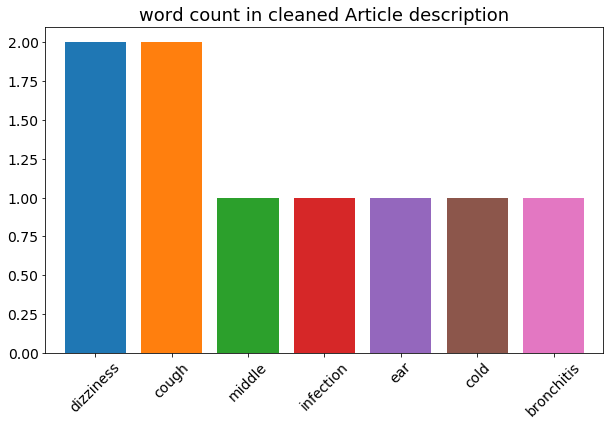

In [31]:
#Extract text for a particular person
name = 'cough dizziness'
text = DF['Symptom_desc'][name]

#Define the count vectorizer that will be used to process the data
count_vectorizer = CountVectorizer()

#Apply this vectorizer to text to get a sparse matrix of counts
count_matrix = count_vectorizer.fit_transform([text])

#Get the names of the features
features = count_vectorizer.get_feature_names()

#Create a series from the sparse matrix
d = pd.Series(count_matrix.toarray().flatten(), 
              index = features).sort_values(ascending=False)

ax = d[:10].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=45,
            title='word count in cleaned Article description')
ax.title.set_size(18)

### TF-IDF Vectors

In [32]:
#Define the TFIDF vectorizer that will be used to process the data
tfidf_vectorizer = TfidfVectorizer()
#Apply this vectorizer to the full dataset to create normalized vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(DF['Symptom_desc'])

In [33]:
tfidf_matrix

<3000x753 sparse matrix of type '<class 'numpy.float64'>'
	with 35853 stored elements in Compressed Sparse Row format>

In [34]:
#Get the names of the features
features = tfidf_vectorizer.get_feature_names()

In [35]:
#get the row that contains relevant vector
row = DF.index.get_loc(name)
#Create a series from the sparse matrix
d = pd.Series(tfidf_matrix.getrow(row).toarray().flatten(), index = features).sort_values(ascending=False)

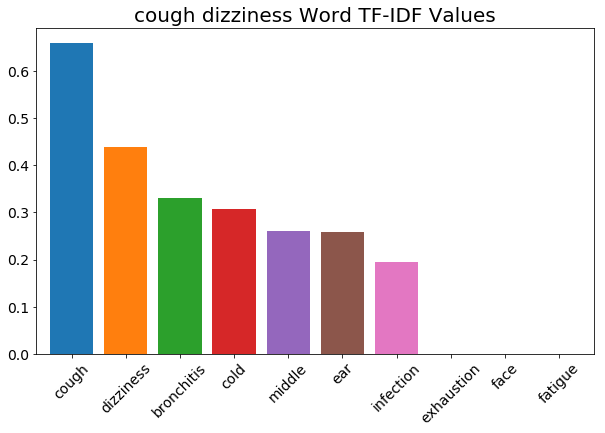

In [36]:
ax = d[:10].plot(kind='bar', title= name + ' Word TF-IDF Values',
            figsize=(10,6), width=.8, fontsize=14, rot=45 )
ax.title.set_size(20)

### Using K-Nearest Neighbors to Identify Similar Articles

In [37]:
nbrs = NearestNeighbors(n_neighbors=10).fit(tfidf_matrix)

def get_closest_neighs(name):
    row = DF['Symptom_desc'].index.get_loc(name)
    distances, indices = nbrs.kneighbors(tfidf_matrix.getrow(row))
    names_similar = pd.Series(indices.flatten()).map(DF['Symptom_desc'].reset_index()['Symptom'])
    result = pd.DataFrame({'distance':distances.flatten(), 'Symptom':names_similar})
    return result

In [38]:
## Options
print('Available Symptoms that can be Searched to Find the other related symptoms')
print("\n".join(Symptom))

Available Symptoms that can be Searched to Find the other related symptoms
muscle cramps spasms painful
bloating fullness constipation increased passing gas muscle cramps spasms painful
bruising discoloration color change pain discomfort swelling
pain discomfort
feeling faint nausea vomiting
enlarged swollen glands lump bulge warm touch
fatigue nausea vomiting upset stomach
difficulty breathing through nose nasal congestion sore throat
bloating fullness urge urinate missed late menstrual period muscle cramps spasms painful
itching burning pain discomfort pain sexual intercourse female vaginal discharge
chills fever headache skin rash
muscle cramps spasms painful pain sexual intercourse female vaginal discharge
diarrhea
bruising discoloration eye irritation
anxiety bloating fullness abdomen bloating fullness pelvis bruising discoloration
bloating fullness change bowel habits muscle cramps spasms painful
joint pain lump bulge muscle cramps spasms painful numbness tingling
joint pain numb

In [39]:
print(get_closest_neighs('feeling faint nausea vomiting'))

                                             Symptom  distance
0                      feeling faint nausea vomiting  0.000000
1            dizziness feeling faint nausea vomiting  0.604455
2                            dizziness feeling faint  0.913070
3                              fatigue feeling faint  0.916192
4                    dizziness fatigue feeling faint  0.945245
5                    dizziness fatigue feeling faint  0.945245
6              dizziness fatigue feeling faint fever  0.965604
7  bloating fullness dizziness fatigue feeling faint  0.975469
8           dizziness fatigue feeling faint headache  0.977430
9           dizziness fatigue feeling faint headache  0.977430


In [40]:
print(get_closest_neighs('pain discomfort'))

                                   Symptom  distance
0                          pain discomfort  0.000000
1                 bleeding pain discomfort  0.879977
2        bloating fullness pain discomfort  0.889036
3        bloating fullness pain discomfort  0.889036
4                 diarrhea pain discomfort  0.952429
5                 diarrhea pain discomfort  0.952429
6          nausea vomiting pain discomfort  0.969717
7          nausea vomiting pain discomfort  0.969717
8        pain discomfort visible deformity  0.983212
9  fatigue nausea vomiting pain discomfort  1.011906


In [41]:
print(get_closest_neighs('diarrhea'))

                      Symptom  distance
0                    diarrhea  0.000000
1  diarrhea numbness tingling  0.579730
2           bleeding diarrhea  0.580267
3  diarrhea distended stomach  0.586887
4  diarrhea distended stomach  0.586887
5         diarrhea warm touch  0.590979
6   diarrhea tenderness touch  0.595229
7             chills diarrhea  0.625349
8         diarrhea lump bulge  0.639314
9          diarrhea skin rash  0.639635
